<p style = "font-size : 50px; color : #000000 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ff0000; border-radius: 5px 5px;"><strong>🍷 Red Wine Quality Analysis</strong></p>



<p style = "font-size : 25px; color : #000000  ; font-family : 'Comic Sans MS';  "><strong> Context:-</strong></p>
<p style = "font-size : 22px; color : #000000  ; font-family : 'Comic Sans MS';  "><strong> The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).</strong></p>
<p style = "font-size : 22px; color : #000000  ; font-family : 'Comic Sans MS';  "><strong>These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).
 </strong></p>




<img style="float: center;  border:5px solid #ff0000; width:100%" src = https://user-images.githubusercontent.com/47216809/86511259-ef33e380-be14-11ea-8ea3-3a3cc4ff5ce8.jpg >

<a id = '0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 

* [Imporing Libraries](#1.0)
* [Loading the data](#2.0)
* [Exploratory Data Analysis (EDA)](#3.0)  
* [Data Preprocessing](#4.0) 
* [Data Modeling](#5.0) 
* [Accuracy Score](#6.0) 
* [Visualization](#7.0) 

<a id = '1.0'></a>
<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Importing Libraries</strong></p>

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Split Data Train and Test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

#Modelling
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve

<a id = '2.0'></a>
<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Loading the dataset</strong></p>

In [2]:
train_data=pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

<a id = '3.0'></a>
<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p>

![giphy.gif](https://media.giphy.com/media/ng6NcNAvohN6M/giphy.gif)

In [3]:
train_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


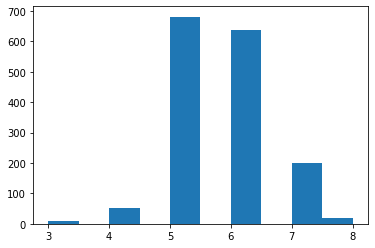

In [4]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(train_data['quality'],bins=10)
plt.show()

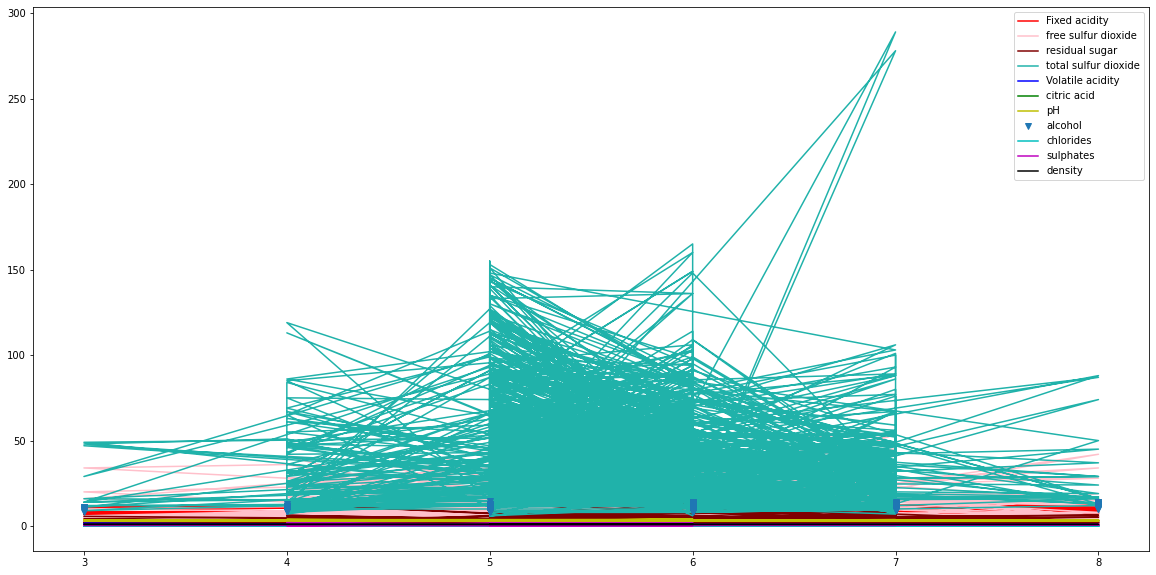

<Figure size 432x288 with 0 Axes>

In [5]:
#Complete Data exploration
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
x=train_data['quality']
plt.plot(x,train_data['fixed acidity'],'r',label='Fixed acidity')
plt.plot(x,train_data['free sulfur dioxide'],'pink',label='free sulfur dioxide')
plt.plot(x,train_data['residual sugar'],'maroon',label='residual sugar')
plt.plot(x,train_data['total sulfur dioxide'],'lightseagreen',label='total sulfur dioxide')
plt.plot(x,train_data['volatile acidity'],'b',label='Volatile acidity')
plt.plot(x,train_data['citric acid'],'g',label='citric acid')
plt.plot(x,train_data['pH'],'y',label='pH')
plt.plot(x,train_data['alcohol'],'v',label='alcohol')
plt.plot(x,train_data['chlorides'],'c',label='chlorides')
plt.plot(x,train_data['sulphates'],'m',label='sulphates')
plt.plot(x,train_data['density'],'k',label='density')
plt.legend(loc=0)
plt.figure()
plt.show()

<a id = '4.0'></a>
<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Data Preprocessing</strong></p>

<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>• Remove Dulpicates</strong></p>



In [6]:
train_data.drop_duplicates(inplace=True)

<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>• Finding null values</strong></p>



In [7]:
train_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>• Finding Co-relation between data features attributes</strong></p>



In [8]:
Corr=train_data.corr()
Corr_res=[]
for i in range(0,len(train_data.dtypes)):
  for j in range(0,len(train_data.dtypes)):
    value=Corr.iloc[i:i+1,j:j+1].values
    if value>0.8 and value!=1 :
     Corr_res.append(Corr.columns[i])

In [9]:
#Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
train_data.iloc[:,:-1]=std.fit_transform(train_data.iloc[:,:-1]) #Standardize data set except dependent value(Quality feature)

<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>Splitting the data</strong></p>


In [10]:
#Assigning dataframe to list of array values
X=train_data.iloc[:,:-1].values
Y=train_data.iloc[:,-1].values

In [11]:
#Split the data set in the ratio of 80:20 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

<a id = '5.0'></a>
<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Data Modeling</strong></p>



<p style = "font-size : 27px; color : #D35400 ; font-family : 'Comic Sans MS';  "><strong>K-Nearest Neighbors</strong></p>



Text(0, 0.5, 'Error Rate')

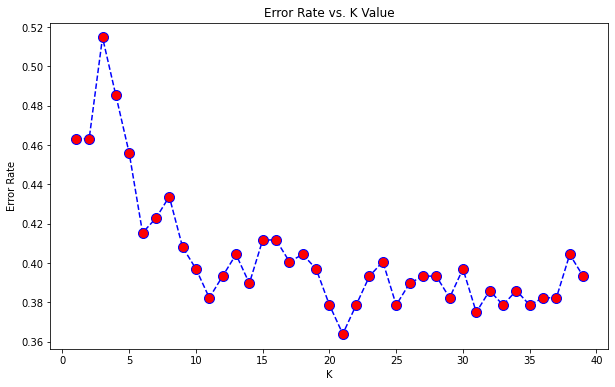

In [12]:
error_rate = []
for i in range(1, 40):
	
	knn = KNeighborsClassifier(n_neighbors = i)
	knn.fit(x_train, y_train)
	pred_i = knn.predict(x_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [13]:
#K=21 has lowest error rate
#Model Fit
classifier2 = KNeighborsClassifier(n_neighbors= 21, metric = 'manhattan', p = 2,weights='uniform')
classifier2.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=21)

In [14]:
#Predicting the ouput from input data (x_train) and (y_train) 
y_pred1 = classifier2.predict(x_train)
y_pred2 = classifier2.predict(x_test)

<a id = '6.0'></a>
<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Accuracy Score</strong></p>



In [15]:
from sklearn.metrics import accuracy_score
print("Accuracy score of train data set:",accuracy_score(y_train, y_pred1))
print("Accuracy score of test data set:",accuracy_score(y_test, y_pred2))

Accuracy score of train data set: 0.6264949402023919
Accuracy score of test data set: 0.6139705882352942


<a id = '7.0'></a>
<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Visualization</strong></p>



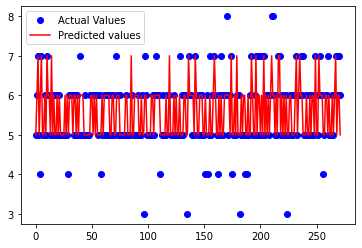

In [16]:
plt.figure()
plt.plot(y_test,'o',color = 'blue',label = 'Actual Values')
plt.plot(y_pred2,color = 'red',label = 'Predicted values')
plt.legend()

<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>• Attempt through Classification</strong></p>


 

In [17]:
train_data['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

<p style = "font-size : 27px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>Quality range:0-10</strong></p>
<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>Dividing Quality range into two parts,</strong></p>
<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>1.  Good quality:7-10</strong></p>
<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>2.  Bad  quality:0-6</strong></p>







In [18]:
#If quality value is less than or eqaul to 6 then it will be in class 0
#If quality value is greater than 6  then it will be in class 1
train_data['quality'] = np.where(train_data['quality'] > 6, 1, 0)
train_data['quality'].value_counts()

0    1175
1     184
Name: quality, dtype: int64

In [19]:
#Assigning dataframe to list of array values
X = train_data.drop(['quality'], axis = 1).values
y = train_data['quality'].values

In [20]:
#Splitting the data in the proportion of 70:30 and 86:14
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                   test_size = 0.3,
                                                   random_state = 1111)

In [21]:
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0
#Fitting the model
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(X_train, y_train)
    
    y_pred_train = pipe_knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

Best Accuracy Score 0.8872549019607843 Best K-Score 41


![giphy.gif](https://media.giphy.com/media/2eK59YqprmQB0GtKHw/giphy.gif)